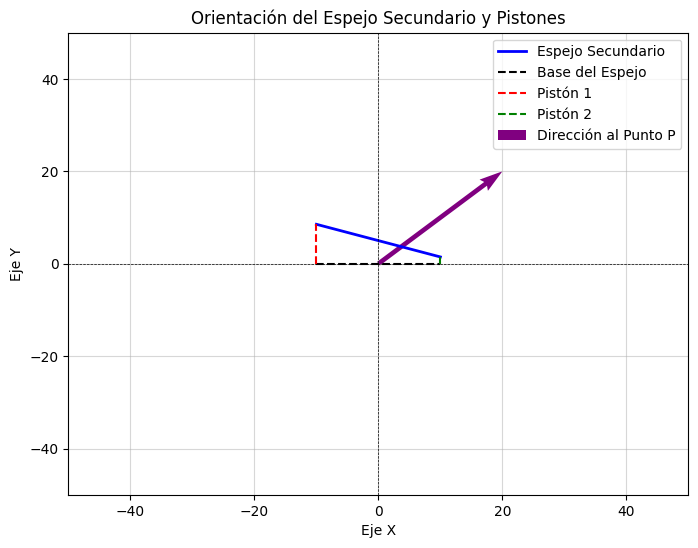

In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt

def calcular_angulo_paralelo(Px, Py):
    return np.arctan2(Py, Px)

def calcular_angulo_perpendicular(Px, Py):
    return np.arctan2(Px, -Py)

def calcular_pistones():
    try:
        # Obtener parámetros de entrada
        L = float(entry_L.get())
        B = float(entry_B.get())
        D = float(entry_D.get())
        dmax = float(entry_dmax.get())
        Px = float(entry_Px.get())
        Py = float(entry_Py.get())

        # Verificar restricciones
        if D > dmax:
            raise ValueError("La longitud mínima de los pistones debe ser menor que la máxima.")
        
        # Calcular el ángulo de orientación del espejo perpendicular al punto P
        theta = calcular_angulo_perpendicular(Px, Py)
        
        # Calcular las longitudes de los pistones
        x1 = D + (L / 2) * np.sin(theta)
        x2 = D - (L / 2) * np.sin(theta)

        # Mostrar resultados en la interfaz
        result_x1.set(f"x1 (Pistón 1): {x1:.2f}")
        result_x2.set(f"x2 (Pistón 2): {x2:.2f}")

        # Llamar a la función para graficar
        graficar(L, B, Px, Py, theta, x1, x2)

    except ValueError as e:
        messagebox.showerror("Error", str(e))
    except Exception:
        messagebox.showerror("Error", "Por favor, ingrese valores válidos.")

def graficar(L, B, Px, Py, theta, x1, x2):
    plt.figure(figsize=(8, 6))

    # Coordenadas del espejo secundario
    mirror_x = [-B / 2, B / 2]
    mirror_y = [x1, x2]

    # Dibujar el espejo secundario
    plt.plot(mirror_x, mirror_y, label="Espejo Secundario", color="blue", linewidth=2)
    
    #dibujar la base del espejo
    plt.plot([-B / 2, B / 2], [0, 0], linestyle="--", color="black", label="Base del Espejo")
    # Dibujar los pistones
    plt.plot([-B / 2, -B / 2], [0, x1], linestyle="--", color="red", label="Pistón 1")
    plt.plot([B / 2, B / 2], [0, x2], linestyle="--", color="green", label="Pistón 2")

    # Dibujar la línea hacia el punto P
    plt.quiver(0, 0, Px, Py, angles='xy', scale_units='xy', scale=1, color="purple", label="Dirección al Punto P")

    # Configurar la gráfica
    plt.title("Orientación del Espejo Secundario y Pistones")
    plt.ylim(-50, 50) 
    plt.xlim(-50, 50)
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()

# Crear ventana principal
root = tk.Tk()
root.title("Cálculo de Pistones para Enfoque del Telescopio")

# Variables de entrada
entry_L = tk.StringVar()
entry_B = tk.StringVar()
entry_D = tk.StringVar()
entry_dmax = tk.StringVar()
entry_Px = tk.StringVar()
entry_Py = tk.StringVar()

# Variables de salida
result_x1 = tk.StringVar()
result_x2 = tk.StringVar()

# Crear interfaz gráfica
tk.Label(root, text="Largo del Espejo (L):").grid(row=0, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_L).grid(row=0, column=1, padx=5, pady=5)

tk.Label(root, text="Separación de Pistones (B):").grid(row=1, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_B).grid(row=1, column=1, padx=5, pady=5)

tk.Label(root, text="Longitud Mínima de Pistones (D):").grid(row=2, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_D).grid(row=2, column=1, padx=5, pady=5)

tk.Label(root, text="Longitud Máxima de Pistones (dmax):").grid(row=3, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_dmax).grid(row=3, column=1, padx=5, pady=5)

tk.Label(root, text="Coordenada X del Punto P:").grid(row=4, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_Px).grid(row=4, column=1, padx=5, pady=5)

tk.Label(root, text="Coordenada Y del Punto P:").grid(row=5, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_Py).grid(row=5, column=1, padx=5, pady=5)

tk.Button(root, text="Calcular", command=calcular_pistones).grid(row=6, column=0, columnspan=2, pady=10)

# Mostrar resultados
tk.Label(root, textvariable=result_x1, fg="blue").grid(row=7, column=0, columnspan=2)
tk.Label(root, textvariable=result_x2, fg="green").grid(row=8, column=0, columnspan=2)

# Iniciar la aplicación
root.mainloop()